# Exercise 4: Spectrograms

You are given a 10-minute long 12 5Hz signal that is mostly white noise, but also contains an added 60 Hz sinusoid for one minute. This 60 Hz sinusoid is known as “mains noise” because it is generated by the mains AC electricity that powers houses and buildings. In the US this AC frequency is at 60Hz. Plot the spectrogram of the signal to figure out in which minute the mains noise occurs. 

Then, remove the 60Hz noise by applying a bandpass filter with a pass band from 3 Hz to 20 Hz and plot the spectrogram again.

# imports

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.signal

In [6]:
import mpld3
mpld3.enable_notebook()

## Load Data

In [7]:
npz = np.load('./exercise4.npz')
sig = npz['signal']

## Bandpass Fitler

In [9]:
def BandpassFilter(signal, pass_band, fs):
    """Bandpass Filter.
    
    Args:
        signal: (np.array) The input signal
        pass_band: (tuple) The pass band. Frequency components outside 
            the two elements in the tuple will be removed.
        fs: (number) The sampling rate of <signal>
        
    Returns:
        (np.array) The filtered signal
    """
    b, a = sp.signal.butter(3, pass_band, btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

## Plot the spectrogram

Text(0, 0.5, 'Frequency (Hz)')

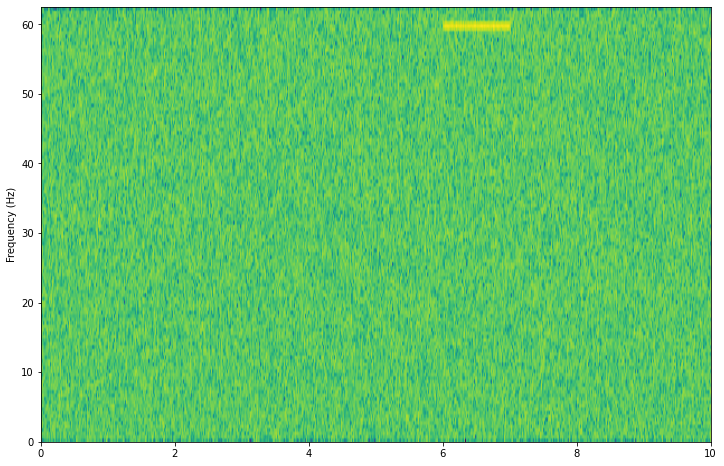

In [10]:
## Your Code Goes Here

fs = 125
plt.figure(figsize=(12, 8))
plt.specgram(sig, Fs=fs, NFFT=250, noverlap=125, xextent=[0, len(sig) / fs / 60]);
plt.xlabel=('Time (min)')
plt.ylabel('Frequency (Hz)')

When does the 60 Hz noise show up? Give in a minute range (e.g., 5:00 to 6:00)
**TODO**

## Filter out the 60 Hz noise

Text(0, 0.5, 'Frequency (Hz)')

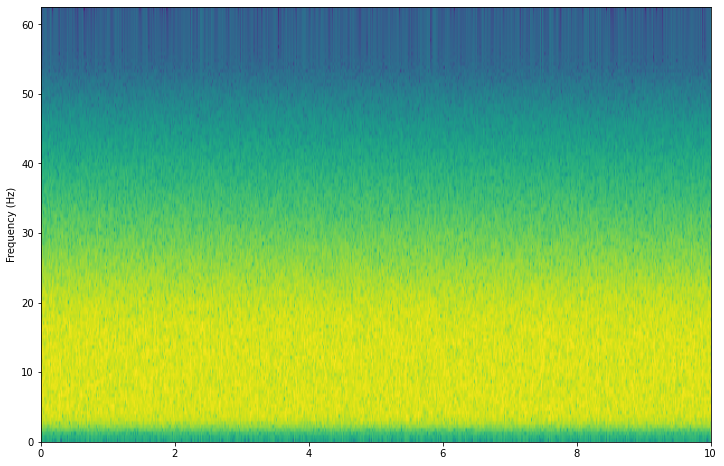

In [14]:
plt.figure(figsize=(12, 8))
filtered_sig = BandpassFilter(sig, (3, 20), fs=fs)
plt.specgram(filtered_sig, Fs=fs, NFFT=250, noverlap=125, xextent=[0, len(sig) / fs / 60]);
plt.xlabel=('Time (min)')
plt.ylabel('Frequency (Hz)')

[solution](https://www.youtube.com/watch?v=lhfTPWIkn28&t=12s&ab_channel=Udacity)

**Key Takeaways**

- We need to use the STFT or spectrogram to visualize a non-stationary signal in the frequency domain effectively.
- We can also use a spectrogram to visualize the effect of a bandpass filter on our signal.
- Again, matplotlib and numpy are our friends here.

**Further Resources**


Plotting a spectrogram or visualizing the short-time Fourier transform are ways of balancing the trade-off between time resolution and frequency resolution.

Surprisingly, this trade-off is related to the quantum uncertainty principle. If you would like to know more about Quantum Uncertainty Principle,
you can watch 3Blue1Brown's video [The more general uncertainty principle, beyond quantum.](https://www.youtube.com/watch?v=MBnnXbOM5S4&ab_channel=3Blue1Brown)

This tutorial is a great explanation of this trade-off as well as a description of the [wavelet transform](https://users.rowan.edu/~polikar/WTpart1.html), which is another solution to this problem.